Neural Networks is a form of AI Machine Learning that is trying to have a computer replicate the human brain. The steps that you would have to take are
    1. Create an approximation model
    2. Configure data set
    3. Set network architecture
    4. Train neural network
    5. Improve generalization performance
    6. Test results
    7. Deploy model

You would check the performance on metrics like accuracy, presision, recall, and F1 Scores. It is meant for the model to predict how correct the outputs are and thats the main reason we use these different performance metrics.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("Credit_card.csv")
df_lab = pd.read_csv("Credit_card_label.csv")
df_merge = pd.merge(df, df_lab, on="Ind_ID", how="outer")
df_merge = df_merge.drop(columns = ["Ind_ID", "Mobile_phone"], axis = 1)
df_merge

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0
3,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,0,0,0,Drivers,2,0
4,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,0,0,1,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,M,N,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,-12784.0,-1537,0,0,0,Drivers,1,0
1544,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958.0,-655,0,0,0,Sales staff,2,0
1545,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,-23643.0,365243,0,1,0,NaN,1,0
1546,M,Y,Y,0,116100.0,Working,Secondary / secondary special,Married,House / apartment,-10136.0,-2441,0,0,0,Laborers,2,0


In [33]:
car_map = {"Y": 1, "N": 2}
df_merge["Car_Owner"] = df["Car_Owner"].map(car_map)
prop_map = {"Y": 1, "N": 2}
df_merge["Propert_Owner"] = df["Propert_Owner"].map(prop_map)
mar_map = {"Married": 1, "Single / not married": 2, "Civil marriage": 3, "Separated": 4, "Widow": 5}
df_merge["Marital_status"] = df["Marital_status"].map(mar_map)
typ_map = {"Working": 1, "Commercial associate": 2, "Pensioner": 3, "State servant": 4}
df_merge["Type_Income"] = df["Type_Income"].map(typ_map)
ed_map = {"Secondary / secondary special": 1, "Higher education": 2, "Incomplete higher": 3, "Lower secondary": 4, "Academic degree": 5}
df_merge["EDUCATION"] = df["EDUCATION"].map(ed_map)
hous_map = {"House / apartment": 1, "With parents": 2, "Municipal apartment": 3, "Rented apartment": 4, "Office apartment": 5, "Co-op apartment": 6}
df_merge["Housing_type"] = df["Housing_type"].map(hous_map)
occ_map = {"Laborers": 1, "Core staff": 2, "Managers": 3, "Sales staff": 4, "Drivers": 5, "High skill tech staff": 6, "Medicine staff": 7, "Accountants": 8,
"Security staff": 9, "Cleaning staff": 10, "Cooking staff": 11, "Private service staff": 12, "Secretaries": 13, "Low-skill Laborers": 14, "Waiters/barmen staff": 15, "HR staff": 16, "IT staff": 17, "Reality agents": 18}
df_merge["Type_Occupation"] = df["Type_Occupation"].map(occ_map)
df_merge["Annual_income"].fillna(0, inplace=True)
df_merge["Type_Occupation"].fillna(0, inplace=True)
df_merge["Birthday_count"].fillna(0, inplace=True)
df_merge

/var/folders/z1/rjx7d_zx5yb0cfkp8qbb5d9w0000gn/T/ipykernel_37195/3612110411.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge["Annual_income"].fillna(0, inplace=True)
/var/folders/z1/rjx7d_zx5yb0cfkp8qbb5d9w0000gn/T/ipykernel_37195/3612110411.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,1,1,0,180000.0,3,2,1,1,-18772.0,365243,0,0,0,0.0,2,1
1,F,1,2,2,135000.0,2,2,1,1,-15761.0,-3173,0,0,0,0.0,4,0
2,F,1,2,0,247500.0,2,2,1,1,-17016.0,-1347,0,0,0,0.0,1,0
3,M,1,2,0,157500.0,2,2,1,1,-9927.0,-828,0,0,0,0.0,2,0
4,F,1,2,2,216000.0,2,2,1,1,-15444.0,-3112,0,0,1,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,M,2,1,0,180000.0,2,2,1,1,-12784.0,-1537,0,0,0,3.0,1,0
1544,F,2,2,0,283500.0,2,3,2,1,-17958.0,-655,0,0,0,8.0,2,0
1545,F,1,1,0,135000.0,1,2,1,1,-23643.0,365243,0,1,0,3.0,1,0
1546,M,1,2,0,116100.0,1,1,3,1,-10136.0,-2441,0,0,0,5.0,2,0


In [34]:
df_merge["Annual_income"].value_counts()

Annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
472500.0      1
787500.0      1
173250.0      1
630000.0      1
116100.0      1
Name: count, Length: 116, dtype: int64

In [35]:
def cleaning(df):
     df_merge["Employed_days"] = df_merge["Employed_days"].apply(lambda x: 0 if x < 0 else 1)
     # 1 = Employed
# 0 = Unemployed
     df_merge["Birthday_count"] = df_merge["Birthday_count"].apply(lambda x: 0 if x < 0 else 1)
# 1 = Birthday coming up
# 0 = Birthday passed
     df_merge["GENDER"] = df_merge["GENDER"].apply(lambda x: 0 if x == "M" else 1)
# 1 = Female
# 0 = Male
# Preprocessing added was the Birthday Count as well as the Gender switching one from categorical data to numerical and the other one just making it simpler to understand
     return df_merge

In [36]:
cleaning(df)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,1,1,0,180000.0,3,2,1,1,0,1,0,0,0,0.0,2,1
1,1,1,2,2,135000.0,2,2,1,1,0,0,0,0,0,0.0,4,0
2,1,1,2,0,247500.0,2,2,1,1,0,0,0,0,0,0.0,1,0
3,0,1,2,0,157500.0,2,2,1,1,0,0,0,0,0,0.0,2,0
4,1,1,2,2,216000.0,2,2,1,1,0,0,0,0,1,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,2,1,0,180000.0,2,2,1,1,0,0,0,0,0,3.0,1,0
1544,1,2,2,0,283500.0,2,3,2,1,0,0,0,0,0,8.0,2,0
1545,1,1,1,0,135000.0,1,2,1,1,0,1,0,1,0,3.0,1,0
1546,0,1,2,0,116100.0,1,1,3,1,0,0,0,0,0,5.0,2,0


In [6]:
%pip install torch


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_merge.drop("label", axis = 1)
y = df_merge["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.FloatTensor(X_train.to_numpy())
X_test = torch.FloatTensor(X_test.to_numpy())

y_test = torch.LongTensor(y_test.to_numpy())
y_train = torch.LongTensor(y_train.to_numpy())

In [48]:
class ANN_Model(nn.Module):
    def __init__(self, input_features = 16, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [49]:
torch.manual_seed(42)

ann = ANN_Model()

In [50]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [51]:
print(X_train.shape)

torch.Size([1083, 16])


In [52]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f"Epoch num {epoch} with loss {loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch num 1 with loss 221.32598876953125
Epoch num 11 with loss 653.7432861328125
Epoch num 21 with loss 179.8817596435547
Epoch num 31 with loss 244.7882843017578
Epoch num 41 with loss 119.24916076660156
Epoch num 51 with loss 24.6852970123291
Epoch num 61 with loss 0.3972463011741638
Epoch num 71 with loss 7.64419412612915
Epoch num 81 with loss 3.156757354736328
Epoch num 91 with loss 4.933267593383789
Epoch num 101 with loss 5.203296661376953
Epoch num 111 with loss 5.444843769073486
Epoch num 121 with loss 5.336032390594482
Epoch num 131 with loss 0.8228671550750732
Epoch num 141 with loss 1.6897441148757935
Epoch num 151 with loss 1.8518571853637695
Epoch num 161 with loss 3.0112733840942383
Epoch num 171 with loss 2.7071850299835205
Epoch num 181 with loss 1.9183497428894043
Epoch num 191 with loss 2.8653504848480225
Epoch num 201 with loss 2.53939151763916
Epoch num 211 with loss 3.057070255279541
Epoch num 221 with loss 1.270416259765625
Epoch num 231 with loss 2.557107925415

In [53]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (467).

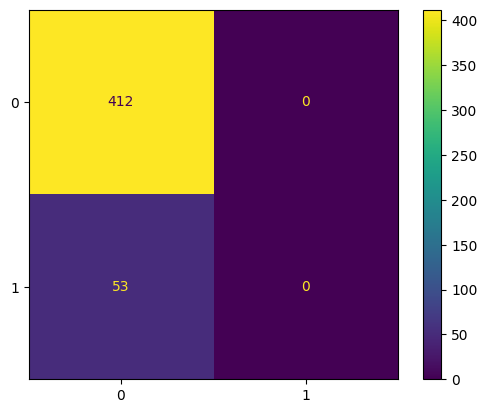

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [56]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [57]:
y_pred = model.predict(X_test)


In [58]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

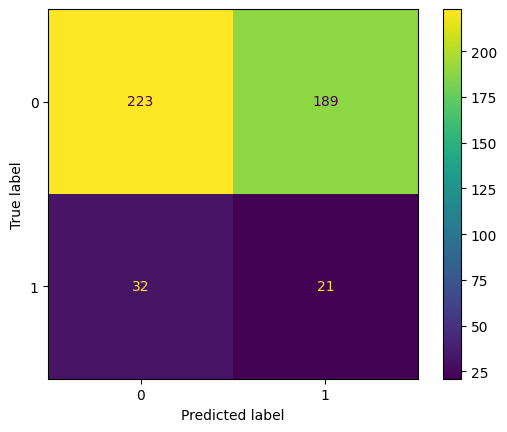

In [59]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [63]:
def calculate(calc_type:str, tp: int, tn: int, fp: int, fn: int) -> float:

    if calc_type == "precision":
        value = tp / (tp + fp)
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn)
        return value
    elif calc_type == "accuracy":
        value = (tp + tn)/(tp + tn + fp + fn)
        return value
    else:
        error_msg = "You messed up :)"
        return error_msg

In [66]:
calculate("precision", 223, 189, 32, 21)

0.8745098039215686

In [67]:
calculate("precision", 412, 0, 53, 0)

0.886021505376344

It seems that the Neural Network performed better than the LogisticRegression. I believe that this is the case because of how the neural network is supposed to replicate how a human things and because of this was better at precision than LogisticRegression. 